# Import Data

In [1]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats
from scipy.stats import sem, t
from scipy import mean
#import plotly.express as px
#import ipywidgets as widgets
#from ipywidgets import interact, interactive, fixed, interact_manual
#import statsmodels.stats
#from statsmodels.stats import *
#import statsmodels.formula.api as smf

In [2]:
with open('DF_Results_SVM.pkl', 'rb') as f:
    data = pickle.load(f)

with open('DF_Results_SVM_noSex.pkl', 'rb') as f:
    data_nosex = pickle.load(f)
    
with open('DF_Results_SVM_noSex_noHeight.pkl', 'rb') as f:
    data_nosexinf = pickle.load(f)
    
with open('DF_Results_NB.pkl','rb') as f:
    data_nb=pickle.load(f)

with open('DF_Results_tree.pkl','rb') as f:
    data_tree=pickle.load(f)

# Calculate Accuracy and Bias

## SVM - ALL DATA

In [3]:
accuracy=[]
accuracy_men=[]
accuracy_women=[]
accuracy_bias=[]

for i in range(0,len(data)):
    acc_men=(data['Confusion Matrix Men'][i][0,0]+data['Confusion Matrix Men'][i][1,1])/(1000*data['Ratio Men'][i])
    accuracy_men.append(float(acc_men))
    acc_women=(data['Confusion Matrix Women'][i][0,0]+data['Confusion Matrix Women'][i][1,1])/(1000*(1-data['Ratio Men'][i]))
    accuracy_women.append(float(acc_women))
    acc_bias=acc_men-acc_women
    accuracy_bias.append(float(acc_bias))
    acc=(data['Confusion Matrix Men'][i][0,0]+data['Confusion Matrix Men'][i][1,1]+data['Confusion Matrix Women'][i][0,0]+data['Confusion Matrix Women'][i][1,1])/1000
    accuracy.append(acc)
    
data['Accuracy Men']=accuracy_men
data["Accuracy Women"]=accuracy_women
data['Bias']=accuracy_bias
data['Accuracy']=accuracy

data['Absolute Bias']=data['Bias'].abs()
data['Absolute Difference']=data['Difference Probabilities'].abs()
data['Informativeness Men']=data['Probability Men'].astype(float)-([0.5]*len(data))
data['Informativeness Men']=data['Informativeness Men'].abs().round(2)
data['Informativeness Women']=data['Probability Women'].astype(float)-([0.5]*len(data))
data['Informativeness Women']=data['Informativeness Women'].abs().round(2)
data['Infomativeness_Difference']=data['Informativeness Men']-data['Informativeness Women']
data['Infomativeness_Difference']=data['Infomativeness_Difference'].round(2)    

## SVM - WITHOUT ANY GENDER INFORMATION

In [4]:
accuracy=[]
accuracy_men=[]
accuracy_women=[]
accuracy_bias=[]

for i in range(0,len(data)):
    acc_men=(data_nosexinf['Confusion Matrix Men'][i][0,0]+data_nosexinf['Confusion Matrix Men'][i][1,1])/(1000*data_nosexinf['Ratio Men'][i])
    accuracy_men.append(float(acc_men))
    acc_women=(data_nosexinf['Confusion Matrix Women'][i][0,0]+data_nosexinf['Confusion Matrix Women'][i][1,1])/(1000*(1-data_nosexinf['Ratio Men'][i]))
    accuracy_women.append(float(acc_women))
    acc_bias=acc_men-acc_women
    accuracy_bias.append(float(acc_bias))
    acc=(data_nosexinf['Confusion Matrix Men'][i][0,0]+data_nosexinf['Confusion Matrix Men'][i][1,1]+data_nosexinf['Confusion Matrix Women'][i][0,0]+data_nosexinf['Confusion Matrix Women'][i][1,1])/1000
    accuracy.append(acc)
    
data_nosexinf['Accuracy Men']=accuracy_men
data_nosexinf["Accuracy Women"]=accuracy_women
data_nosexinf['Bias']=accuracy_bias
data_nosexinf['Accuracy']=accuracy

data_nosexinf['Absolute Bias']=data_nosexinf['Bias'].abs()
data_nosexinf['Absolute Difference']=data_nosexinf['Difference Probabilities'].abs()
data_nosexinf['Informativeness Men']=data_nosexinf['Probability Men'].astype(float)-([0.5]*len(data_nosexinf))
data_nosexinf['Informativeness Men']=data_nosexinf['Informativeness Men'].abs().round(2)
data_nosexinf['Informativeness Women']=data_nosexinf['Probability Women'].astype(float)-([0.5]*len(data_nosexinf))
data_nosexinf['Informativeness Women']=data_nosexinf['Informativeness Women'].abs().round(2)
data_nosexinf['Infomativeness_Difference']=data_nosexinf['Informativeness Men']-data_nosexinf['Informativeness Women']
data_nosexinf['Infomativeness_Difference']=data_nosexinf['Infomativeness_Difference'].round(2)    

## SVM - WITHOUT GENDER

In [5]:
accuracy=[]
accuracy_men=[]
accuracy_women=[]
accuracy_bias=[]

for i in range(0,len(data)):
    acc_men=(data_nosex['Confusion Matrix Men'][i][0,0]+data_nosex['Confusion Matrix Men'][i][1,1])/(1000*data_nosex['Ratio Men'][i])
    accuracy_men.append(float(acc_men))
    acc_women=(data_nosex['Confusion Matrix Women'][i][0,0]+data_nosex['Confusion Matrix Women'][i][1,1])/(1000*(1-data_nosex['Ratio Men'][i]))
    accuracy_women.append(float(acc_women))
    acc_bias=acc_men-acc_women
    accuracy_bias.append(float(acc_bias))
    acc=(data_nosex['Confusion Matrix Men'][i][0,0]+data_nosex['Confusion Matrix Men'][i][1,1]+data_nosex['Confusion Matrix Women'][i][0,0]+data_nosex['Confusion Matrix Women'][i][1,1])/1000
    accuracy.append(acc)

data_nosex['Accuracy Men']=accuracy_men
data_nosex["Accuracy Women"]=accuracy_women
data_nosex['Bias']=accuracy_bias
data_nosex['Accuracy']=accuracy

data_nosex['Absolute Bias']=data_nosex['Bias'].abs()
data_nosex['Absolute Difference']=data_nosex['Difference Probabilities'].abs()
data_nosex['Informativeness Men']=data_nosex['Probability Men'].astype(float)-([0.5]*len(data_nosex))
data_nosex['Informativeness Men']=data_nosex['Informativeness Men'].abs().round(2)
data_nosex['Informativeness Women']=data_nosex['Probability Women'].astype(float)-([0.5]*len(data_nosex))
data_nosex['Informativeness Women']=data_nosex['Informativeness Women'].abs().round(2)
data_nosex['Infomativeness_Difference']=data_nosex['Informativeness Men']-data_nosex['Informativeness Women']
data_nosex['Infomativeness_Difference']=data_nosex['Infomativeness_Difference'].round(2)    

## NAIVE BAYES - ALL DATA

In [6]:
accuracy=[]
accuracy_men_nb=[]
accuracy_women_nb=[]
accuracy_bias_nb=[]

for i in range(0,len(data_nb)):
    acc_men=(data_nb['Confusion Matrix Men'][i][0,0]+data_nb['Confusion Matrix Men'][i][1,1])/(1000*data_nb['Ratio Men'][i])
    accuracy_men_nb.append(float(acc_men))
    acc_women=(data_nb['Confusion Matrix Women'][i][0,0]+data_nb['Confusion Matrix Women'][i][1,1])/(1000*(1-data_nb['Ratio Men'][i]))
    accuracy_women_nb.append(float(acc_women))
    acc_bias=acc_men-acc_women
    accuracy_bias_nb.append(float(acc_bias))
    acc=(data_nb['Confusion Matrix Men'][i][0,0]+data_nb['Confusion Matrix Men'][i][1,1]+data_nb['Confusion Matrix Women'][i][0,0]+data_nb['Confusion Matrix Women'][i][1,1])/1000
    accuracy.append(acc)
    

data_nb['Accuracy Men']=accuracy_men_nb
data_nb["Accuracy Women"]=accuracy_women_nb
data_nb['Bias']=accuracy_bias_nb
data_nb['Accuracy']=accuracy

data_nb['Absolute Bias']=data_nb['Bias'].abs()
data_nb['Absolute Difference']=data_nb['Difference Probabilities'].abs()
data_nb['Informativeness Men']=data_nb['Probability Men'].astype(float)-([0.5]*len(data))
data_nb['Informativeness Men']=data_nb['Informativeness Men'].abs().round(2)
data_nb['Informativeness Women']=data_nb['Probability Women'].astype(float)-([0.5]*len(data))
data_nb['Informativeness Women']=data_nb['Informativeness Women'].abs().round(2)
data_nb['Infomativeness_Difference']=data_nb['Informativeness Men']-data_nb['Informativeness Women']
data_nb['Infomativeness_Difference']=data_nb['Infomativeness_Difference'].round(2)

## DECISION TREE - ALL DATA

In [7]:
accuracy=[]
accuracy_men_tree=[]
accuracy_women_tree=[]
accuracy_bias_tree=[]

for i in range(0,len(data_tree)):
    acc_men=(data_tree['Confusion Matrix Men'][i][0,0]+data_tree['Confusion Matrix Men'][i][1,1])/(1000*data_tree['Ratio Men'][i])
    accuracy_men_tree.append(float(acc_men))
    acc_women=(data_tree['Confusion Matrix Women'][i][0,0]+data_tree['Confusion Matrix Women'][i][1,1])/(1000*(1-data_tree['Ratio Men'][i]))
    accuracy_women_tree.append(float(acc_women))
    acc_bias=acc_men-acc_women
    accuracy_bias_tree.append(float(acc_bias))
    acc=(data_tree['Confusion Matrix Men'][i][0,0]+data_tree['Confusion Matrix Men'][i][1,1]+data_tree['Confusion Matrix Women'][i][0,0]+data_tree['Confusion Matrix Women'][i][1,1])/1000
    accuracy.append(acc)

data_tree['Accuracy Men']=accuracy_men_tree
data_tree["Accuracy Women"]=accuracy_women_tree
data_tree['Bias']=accuracy_bias_tree
data_tree['Accuracy']=accuracy

data_tree['Absolute Bias']=data_tree['Bias'].abs()
data_tree['Absolute Difference']=data_tree['Difference Probabilities'].abs()
data_tree['Informativeness Men']=data_tree['Probability Men'].astype(float)-([0.5]*len(data))
data_tree['Informativeness Men']=data_tree['Informativeness Men'].abs().round(2)
data_tree['Informativeness Women']=data_tree['Probability Women'].astype(float)-([0.5]*len(data))
data_tree['Informativeness Women']=data_tree['Informativeness Women'].abs().round(2)
data_tree['Infomativeness_Difference']=data_tree['Informativeness Men']-data_tree['Informativeness Women']
data_tree['Infomativeness_Difference']=data_tree['Infomativeness_Difference'].round(2)
    

In [8]:
data.rename(columns={'Difference Probabilities':'Difference_Probabilities',
                          'Probability Men':'Probability_Men',
                          'Ratio Men':'Ratio_Men'}, 
                 inplace=True)

data_nosex.rename(columns={'Difference Probabilities':'Difference_Probabilities',
                          'Probability Men':'Probability_Men',
                          'Ratio Men':'Ratio_Men'}, 
                 inplace=True)

data_nosexinf.rename(columns={'Difference Probabilities':'Difference_Probabilities',
                          'Probability Men':'Probability_Men',
                          'Ratio Men':'Ratio_Men'}, 
                 inplace=True)

data_nb.rename(columns={'Difference Probabilities':'Difference_Probabilities',
                          'Probability Men':'Probability_Men',
                          'Ratio Men':'Ratio_Men'}, 
                 inplace=True)

data_tree.rename(columns={'Difference Probabilities':'Difference_Probabilities',
                          'Probability Men':'Probability_Men',
                          'Ratio Men':'Ratio_Men'}, 
                 inplace=True)

In [9]:
#Datasets Fixed for Ratio Men
data_50=data[data['Ratio_Men'].astype(str)=='0.50']
data_65=data[data['Ratio_Men'].astype(str)=='0.65']
data_80=data[data['Ratio_Men'].astype(str)=='0.80']
data_95=data[data['Ratio_Men'].astype(str)=='0.95']

#Datasets Fixed for Probability Difference
data_dn15=data[data['Difference_Probabilities'].astype(str)=='-0.15']
data_dn30=data[data['Difference_Probabilities'].astype(str)=='-0.30']
data_dn45=data[data['Difference_Probabilities'].astype(str)=='-0.45']
data_d00=data[data['Difference_Probabilities'].astype(str)=='0.00']
data_d15=data[data['Difference_Probabilities'].astype(str)=='0.15']
data_d30=data[data['Difference_Probabilities'].astype(str)=='0.30']
data_d45=data[data['Difference_Probabilities'].astype(str)=='0.45']

#Datasets Fixed for Probability Men
data_p05=data[data['Probability_Men'].astype(str)=='0.05']
data_p20=data[data['Probability_Men'].astype(str)=='0.20']
data_p35=data[data['Probability_Men'].astype(str)=='0.35']
data_p50=data[data['Probability_Men'].astype(str)=='0.50']
data_p65=data[data['Probability_Men'].astype(str)=='0.65']
data_p80=data[data['Probability_Men'].astype(str)=='0.80']
data_p95=data[data['Probability_Men'].astype(str)=='0.95']

#Datasets Fixed for Ratio Men
data_nosex_50=data_nosex[data_nosex['Ratio_Men'].astype(str)=='0.50']
data_nosex_65=data_nosex[data_nosex['Ratio_Men'].astype(str)=='0.65']
data_nosex_80=data_nosex[data_nosex['Ratio_Men'].astype(str)=='0.80']
data_nosex_95=data_nosex[data_nosex['Ratio_Men'].astype(str)=='0.95']

#Datasets Fixed for Probability Difference
data_nosex_dn15=data_nosex[data_nosex['Difference_Probabilities'].astype(str)=='-0.15']
data_nosex_dn30=data_nosex[data_nosex['Difference_Probabilities'].astype(str)=='-0.30']
data_nosex_dn45=data_nosex[data_nosex['Difference_Probabilities'].astype(str)=='-0.45']
data_nosex_d00=data_nosex[data_nosex['Difference_Probabilities'].astype(str)=='0.00']
data_nosex_d15=data_nosex[data_nosex['Difference_Probabilities'].astype(str)=='0.15']
data_nosex_d30=data_nosex[data_nosex['Difference_Probabilities'].astype(str)=='0.30']
data_nosex_d45=data_nosex[data_nosex['Difference_Probabilities'].astype(str)=='0.45']

#Datasets Fixed for Probability Men
data_nosex_p05=data_nosex[data_nosex['Probability_Men'].astype(str)=='0.05']
data_nosex_p20=data_nosex[data_nosex['Probability_Men'].astype(str)=='0.20']
data_nosex_p35=data_nosex[data_nosex['Probability_Men'].astype(str)=='0.35']
data_nosex_p50=data_nosex[data_nosex['Probability_Men'].astype(str)=='0.50']
data_nosex_p65=data_nosex[data_nosex['Probability_Men'].astype(str)=='0.65']
data_nosex_p80=data_nosex[data_nosex['Probability_Men'].astype(str)=='0.80']
data_nosex_p95=data_nosex[data_nosex['Probability_Men'].astype(str)=='0.95']

#Datasets Fixed for Ratio Men
data_nosexinf_50=data_nosexinf[data_nosexinf['Ratio_Men'].astype(str)=='0.50']
data_nosexinf_65=data_nosexinf[data_nosexinf['Ratio_Men'].astype(str)=='0.65']
data_nosexinf_80=data_nosexinf[data_nosexinf['Ratio_Men'].astype(str)=='0.80']
data_nosexinf_95=data_nosexinf[data_nosexinf['Ratio_Men'].astype(str)=='0.95']

#Datasets Fixed for Probability Difference
data_nosexinf_dn15=data_nosexinf[data_nosexinf['Difference_Probabilities'].astype(str)=='-0.15']
data_nosexinf_dn30=data_nosexinf[data_nosexinf['Difference_Probabilities'].astype(str)=='-0.30']
data_nosexinf_dn45=data_nosexinf[data_nosexinf['Difference_Probabilities'].astype(str)=='-0.45']
data_nosexinf_d00=data_nosexinf[data_nosexinf['Difference_Probabilities'].astype(str)=='0.00']
data_nosexinf_d15=data_nosexinf[data_nosexinf['Difference_Probabilities'].astype(str)=='0.15']
data_nosexinf_d30=data_nosexinf[data_nosexinf['Difference_Probabilities'].astype(str)=='0.30']
data_nosexinf_d45=data_nosexinf[data_nosexinf['Difference_Probabilities'].astype(str)=='0.45']

#Datasets Fixed for Probability Men
data_nosexinf_p05=data_nosexinf[data_nosexinf['Probability_Men'].astype(str)=='0.05']
data_nosexinf_p20=data_nosexinf[data_nosexinf['Probability_Men'].astype(str)=='0.20']
data_nosexinf_p35=data_nosexinf[data_nosexinf['Probability_Men'].astype(str)=='0.35']
data_nosexinf_p50=data_nosexinf[data_nosexinf['Probability_Men'].astype(str)=='0.50']
data_nosexinf_p65=data_nosexinf[data_nosexinf['Probability_Men'].astype(str)=='0.65']
data_nosexinf_p80=data_nosexinf[data_nosexinf['Probability_Men'].astype(str)=='0.80']
data_nosexinf_p95=data_nosexinf[data_nosexinf['Probability_Men'].astype(str)=='0.95']

#Datasets Fixed for Ratio Men
data_nb_50=data_nb[data_nb['Ratio_Men'].astype(str)=='0.50']
data_nb_65=data_nb[data_nb['Ratio_Men'].astype(str)=='0.65']
data_nb_80=data_nb[data_nb['Ratio_Men'].astype(str)=='0.80']
data_nb_95=data_nb[data_nb['Ratio_Men'].astype(str)=='0.95']

#Datasets Fixed for Probability Difference
data_nb_dn15=data_nb[data_nb['Difference_Probabilities'].astype(str)=='-0.15']
data_nb_dn30=data_nb[data_nb['Difference_Probabilities'].astype(str)=='-0.30']
data_nb_dn45=data_nb[data_nb['Difference_Probabilities'].astype(str)=='-0.45']
data_nb_d00=data_nb[data_nb['Difference_Probabilities'].astype(str)=='0.00']
data_nb_d15=data_nb[data_nb['Difference_Probabilities'].astype(str)=='0.15']
data_nb_d30=data_nb[data_nb['Difference_Probabilities'].astype(str)=='0.30']
data_nb_d45=data_nb[data_nb['Difference_Probabilities'].astype(str)=='0.45']

#Datasets Fixed for Probability Men
data_nb_p05=data_nb[data_nb['Probability_Men'].astype(str)=='0.05']
data_nb_p20=data_nb[data_nb['Probability_Men'].astype(str)=='0.20']
data_nb_p35=data_nb[data_nb['Probability_Men'].astype(str)=='0.35']
data_nb_p50=data_nb[data_nb['Probability_Men'].astype(str)=='0.50']
data_nb_p65=data_nb[data_nb['Probability_Men'].astype(str)=='0.65']
data_nb_p80=data_nb[data_nb['Probability_Men'].astype(str)=='0.80']
data_nb_p95=data_nb[data_nb['Probability_Men'].astype(str)=='0.95']

#Datasets Fixed for Ratio Men
data_tree_50=data_tree[data_tree['Ratio_Men'].astype(str)=='0.50']
data_tree_65=data_tree[data_tree['Ratio_Men'].astype(str)=='0.65']
data_tree_80=data_tree[data_tree['Ratio_Men'].astype(str)=='0.80']
data_tree_95=data_tree[data_tree['Ratio_Men'].astype(str)=='0.95']

#Datasets Fixed for Probability Difference
data_tree_dn15=data_tree[data_tree['Difference_Probabilities'].astype(str)=='-0.15']
data_tree_dn30=data_tree[data_tree['Difference_Probabilities'].astype(str)=='-0.30']
data_tree_dn45=data_tree[data_tree['Difference_Probabilities'].astype(str)=='-0.45']
data_tree_d00=data_tree[data_tree['Difference_Probabilities'].astype(str)=='0.00']
data_tree_d15=data_tree[data_tree['Difference_Probabilities'].astype(str)=='0.15']
data_tree_d30=data_tree[data_tree['Difference_Probabilities'].astype(str)=='0.30']
data_tree_d45=data_tree[data_tree['Difference_Probabilities'].astype(str)=='0.45']

#Datasets Fixed for Probability Men
data_tree_p05=data_tree[data_tree['Probability_Men'].astype(str)=='0.05']
data_tree_p20=data_tree[data_tree['Probability_Men'].astype(str)=='0.20']
data_tree_p35=data_tree[data_tree['Probability_Men'].astype(str)=='0.35']
data_tree_p50=data_tree[data_tree['Probability_Men'].astype(str)=='0.50']
data_tree_p65=data_tree[data_tree['Probability_Men'].astype(str)=='0.65']
data_tree_p80=data_tree[data_tree['Probability_Men'].astype(str)=='0.80']
data_tree_p95=data_tree[data_tree['Probability_Men'].astype(str)=='0.95']

# Show Data


In [10]:
data[1:6]

,Exp. Group,# Dataset,Seed,Ratio_Men,Probability_Men,Probability Women,Difference_Probabilities,Confusion Matrix Men,Confusion Matrix Women,Accuracy Men,Accuracy Women,Bias,Accuracy,Absolute Bias,Absolute Difference,Informativeness Men,Informativeness Women,Infomativeness_Difference
1,1,2,2041,0.50,0.05,0.05,0.00,"[[474, 0], [23, 3]]","[[465, 2], [27, 6]]",0.954,0.942,0.012,0.948,0.012,0.00,0.45,0.45,0.0
2,1,3,708,0.50,0.05,0.05,0.00,"[[477, 7], [13, 3]]","[[479, 0], [15, 6]]",0.960,0.970,-0.010,0.965,0.010,0.00,0.45,0.45,0.0
3,1,4,4559,0.50,0.05,0.05,0.00,"[[465, 0], [35, 0]]","[[472, 0], [28, 0]]",0.930,0.944,-0.014,0.937,0.014,0.00,0.45,0.45,0.0
4,1,5,3465,0.50,0.05,0.05,0.00,"[[475, 0], [25, 0]]","[[462, 0], [38, 0]]",0.950,0.924,0.026,0.937,0.026,0.00,0.45,0.45,0.0
5,1,6,3206,0.50,0.05,0.05,0.00,"[[483, 0], [17, 0]]","[[480, 0], [20, 0]]",0.966,0.960,0.006,0.963,0.006,0.00,0.45,0.45,0.0


# Describe our Data

In [11]:
print("Accuracy of SVM (NB)")
print(data_nb['Accuracy'].describe())
print("Accuracy Bias of SVM (NB)")
print(data_nb['Bias'].describe())
print("Absolute Accuracy Bias of SVM (NB)")
print(data_nb['Absolute Bias'].describe())

print("Accuracy of SVM (Tree)")
print(data_tree['Accuracy'].describe())
print("Accuracy Bias of SVM (Tree)")
print(data_tree['Bias'].describe())
print("Absolute Accuracy Bias of SVM (Tree)")
print(data_tree['Absolute Bias'].describe())


Accuracy of SVM (NB)
count    81400.000000
mean         0.831147
std          0.065855
min          0.108000
25%          0.798000
50%          0.821000
75%          0.865000
max          0.974000
Name: Accuracy, dtype: float64
Accuracy Bias of SVM (NB)
count    81400.000000
mean         0.052943
std          0.191391
min         -0.893684
25%         -0.039780
50%          0.018022
75%          0.129474
max          0.874737
Name: Bias, dtype: float64
Absolute Accuracy Bias of SVM (NB)
count    81400.000000
mean         0.133397
std          0.147100
min          0.000000
25%          0.028000
50%          0.081250
75%          0.199176
max          0.893684
Name: Absolute Bias, dtype: float64
Accuracy of SVM (Tree)
count    81400.000000
mean         0.801452
std          0.062686
min          0.658000
25%          0.752000
50%          0.786000
75%          0.836000
max          0.966000
Name: Accuracy, dtype: float64
Accuracy Bias of SVM (Tree)
count    81400.000000
mean         0.0

In [12]:
print("Accuracy of SVM (ALL DATA)")
print(data['Accuracy'].describe())
print("Accuracy Bias of SVM (ALL DATA)")
print(data['Bias'].describe())
print("Absolute Accuracy Bias of SVM (ALL DATA)")
print(data['Absolute Bias'].describe())

print("Accuracy of SVM (NO GENDER)")
print(data_nosex['Accuracy'].describe())
print("Accuracy Bias of SVM (NO GENDER)")
print(data_nosex['Bias'].describe())
print("Absolute Accuracy Bias of SVM (NO GENDER)")
print(data_nosex['Absolute Bias'].describe())

print("Accuracy of SVM (NO GENDER INF)")
print(data_nosexinf['Accuracy'].describe())
print("Accuracy Bias of SVM (NO GENDER INF)")
print(data_nosexinf['Bias'].describe())
print("Absolute Accuracy Bias of SVM (NO GENDER INF)")
print(data_nosexinf['Absolute Bias'].describe())

Accuracy of SVM (ALL DATA)
count    81400.000000
mean         0.859668
std          0.046186
min          0.767000
25%          0.823000
50%          0.849000
75%          0.887000
max          0.975000
Name: Accuracy, dtype: float64
Accuracy Bias of SVM (ALL DATA)
count    81400.000000
mean         0.000511
std          0.087089
min         -0.213684
25%         -0.056000
50%         -0.001250
75%          0.056000
max          0.383158
Name: Bias, dtype: float64
Absolute Accuracy Bias of SVM (ALL DATA)
count    81400.000000
mean         0.068706
std          0.053518
min          0.000000
25%          0.023736
50%          0.056000
75%          0.106250
max          0.383158
Name: Absolute Bias, dtype: float64
Accuracy of SVM (NO GENDER)
count    81400.000000
mean         0.857893
std          0.046065
min          0.769000
25%          0.822000
50%          0.846000
75%          0.884000
max          0.975000
Name: Accuracy, dtype: float64
Accuracy Bias of SVM (NO GENDER)
count    8

# Visualization

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(16, 10))
sns.set(font_scale=2.5)
plt.title("Bias - Gender Information (Gender and Height) Available for Learner")
ax = sns.boxplot(x="Exp. Group", y="Bias",data=data,width=0.8)
ax.set(ylim=(-0.4,0.4))
ax

ax.figure.savefig("Overview_SVM_ALLDATA")

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(16, 10))
sns.set(font_scale=2.5)
plt.title("Bias - No Gender Available for Learner (Only Genderrelated Weigth)")
ax = sns.boxplot(x="Exp. Group", y="Bias",data=data_nosex,width=0.8)
ax.set(ylim=(-0.4,0.4))
ax

ax.figure.savefig("Overview_SVM_NOSEX")

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(16, 10))
sns.set(font_scale=2.5)
plt.title("Bias - No Gender Related Information Available for Learner")
ax = sns.boxplot(x="Exp. Group", y="Bias",data=data_nosexinf,width=0.8)
ax.set(ylim=(-0.4,0.4))
ax

ax.figure.savefig("Overview_SVM_NOSEXINF")

In [ ]:
acmen_sd=data.loc[:,"Accuracy Men"].std()
acmen_mean=data.loc[:,"Accuracy Men"].mean()
acwomen_sd=data.loc[:,"Accuracy Women"].std()
acwomen_mean=data.loc[:,"Accuracy Women"].mean()
bias_ds=data.loc[:,"Bias"].std()
bias_mean=data.loc[:,"Bias"].mean()

In [19]:
with open('possibleacc.pkl', 'rb') as f:
    possible_accuracys=pickle.load(f)
    

In [15]:
am=[]
asd=[]
amm=[]
amsd=[]
afm=[]
afsd=[]
biasm=[]
biassd=[]
for i in range(1,149): 
    data_group=data[data['Exp. Group']==i]
    am.append(data_group.loc[:,'Accuracy'].mean())
    asd.append(data_group.loc[:,'Accuracy'].std())
    amm.append(data_group.loc[:,'Accuracy Men'].mean())
    amsd.append(data_group.loc[:,'Accuracy Men'].std())
    afm.append(data_group.loc[:,'Accuracy Women'].mean())           
    afsd.append(data_group.loc[:,'Accuracy Women'].std())
    biasm.append(data_group.loc[:,'Bias'].mean())
    biassd.append(data_group.loc[:,'Bias'].std())
    
data_group_svm=pd.DataFrame()
data_group_svm['Mean Accuracy']=am
data_group_svm['SD Accuracy']=asd
data_group_svm['Mean Accuracy Men']=amm
data_group_svm['SD Accuracy Men']=amsd
data_group_svm['Mean Accuracy Women']=afm
data_group_svm['SD Accuracy Women']=afsd
data_group_svm['Mean Bias']=biasm
data_group_svm['SD Bias']=biassd
data_group_svm['Possible Accuracy']=possible_accuracys['possible accuracys']

amm=[]
amsd=[]
afm=[]
afsd=[]
biasm=[]
biassd=[]
for i in range(1,49): 
    data_group_50=data_50[data_50['Exp. Group']==i]
    amm.append(data_group_50.loc[:,'Accuracy Men'].mean())
    amsd.append(data_group_50.loc[:,'Accuracy Men'].std())
    afm.append(data_group_50.loc[:,'Accuracy Women'].mean())           
    afsd.append(data_group_50.loc[:,'Accuracy Women'].std())
    biasm.append(data_group_50.loc[:,'Bias'].mean())
    biassd.append(data_group_50.loc[:,'Bias'].std())
    
data_group_svm_50=pd.DataFrame()
data_group_svm_50['Mean Accuracy Men']=amm
data_group_svm_50['SD Accuracy Men']=amsd
data_group_svm_50['Mean Accuracy Women']=afm
data_group_svm_50['SD Accuracy Women']=afsd
data_group_svm_50['Mean Bias']=biasm
data_group_svm_50['SD Bias']=biassd

amm=[]
amsd=[]
afm=[]
afsd=[]
biasm=[]
biassd=[]
for i in range(48,97): 
    data_group_65=data_65[data_65['Exp. Group']==i]
    amm.append(data_group_65.loc[:,'Accuracy Men'].mean())
    amsd.append(data_group_65.loc[:,'Accuracy Men'].std())
    afm.append(data_group_65.loc[:,'Accuracy Women'].mean())           
    afsd.append(data_group_65.loc[:,'Accuracy Women'].std())
    biasm.append(data_group_65.loc[:,'Bias'].mean())
    biassd.append(data_group_65.loc[:,'Bias'].std())
    
data_group_svm_65=pd.DataFrame()
data_group_svm_65['Mean Accuracy Men']=amm
data_group_svm_65['SD Accuracy Men']=amsd
data_group_svm_65['Mean Accuracy Women']=afm
data_group_svm_65['SD Accuracy Women']=afsd
data_group_svm_65['Mean Bias']=biasm
data_group_svm_65['SD Bias']=biassd

amm=[]
amsd=[]
afm=[]
afsd=[]
biasm=[]
biassd=[]
group=[]
for i in range(97,118): 
    data_group_80=data_80[data_80['Exp. Group']==i]
    amm.append(data_group_80.loc[:,'Accuracy Men'].mean())
    amsd.append(data_group_80.loc[:,'Accuracy Men'].std())
    afm.append(data_group_80.loc[:,'Accuracy Women'].mean())           
    afsd.append(data_group_80.loc[:,'Accuracy Women'].std())
    biasm.append(data_group_80.loc[:,'Bias'].mean())
    biassd.append(data_group_80.loc[:,'Bias'].std())
    group.append(i)
    
data_group_svm_80=pd.DataFrame()
data_group_svm_80['Group']=group
data_group_svm_80['Mean Accuracy Men']=amm
data_group_svm_80['SD Accuracy Men']=amsd
data_group_svm_80['Mean Accuracy Women']=afm
data_group_svm_80['SD Accuracy Women']=afsd
data_group_svm_80['Mean Bias']=biasm
data_group_svm_80['SD Bias']=biassd

amm=[]
amsd=[]
afm=[]
afsd=[]
biasm=[]
biassd=[]
group=[]
for i in range(118,149): 
    data_group_95=data_95[data_95['Exp. Group']==i]
    amm.append(data_group_95.loc[:,'Accuracy Men'].mean())
    amsd.append(data_group_95.loc[:,'Accuracy Men'].std())
    afm.append(data_group_95.loc[:,'Accuracy Women'].mean())           
    afsd.append(data_group_95.loc[:,'Accuracy Women'].std())
    biasm.append(data_group_95.loc[:,'Bias'].mean())
    biassd.append(data_group_95.loc[:,'Bias'].std())
    group.append(i)
    
data_group_svm_95=pd.DataFrame()
data_group_svm_95['Group']=group
data_group_svm_95['Mean Accuracy Men']=amm
data_group_svm_95['SD Accuracy Men']=amsd
data_group_svm_95['Mean Accuracy Women']=afm
data_group_svm_95['SD Accuracy Women']=afsd
data_group_svm_95['Mean Bias']=biasm
data_group_svm_95['SD Bias']=biassd
    

In [16]:
amm=[]
amsd=[]
afm=[]
afsd=[]
biasm=[]
biassd=[]
for i in range(1,149): 
    data_group=data_nb[data_nb['Exp. Group']==i]
    amm.append(data_group.loc[:,'Accuracy Men'].mean())
    amsd.append(data_group.loc[:,'Accuracy Men'].std())
    afm.append(data_group.loc[:,'Accuracy Women'].mean())           
    afsd.append(data_group.loc[:,'Accuracy Women'].std())
    biasm.append(data_group.loc[:,'Bias'].mean())
    biassd.append(data_group.loc[:,'Bias'].std())
    
import pandas as pd
data_group_nb=pd.DataFrame()
data_group_nb['Mean Accuracy Men']=amm
data_group_nb['SD Accuracy Men']=amsd
data_group_nb['Mean Accuracy Women']=afm
data_group_nb['SD Accuracy Women']=afsd
data_group_nb['Mean Bias']=biasm
data_group_nb['SD Bias']=biassd


In [ ]:
amm=[]
amsd=[]
afm=[]
afsd=[]
biasm=[]
biassd=[]
for i in range(1,149): 
    data_group=data_tree[data_tree['Exp. Group']==i]
    amm.append(data_group.loc[:,'Accuracy Men'].mean())
    amsd.append(data_group.loc[:,'Accuracy Men'].std())
    afm.append(data_group.loc[:,'Accuracy Women'].mean())           
    afsd.append(data_group.loc[:,'Accuracy Women'].std())
    biasm.append(data_group.loc[:,'Bias'].mean())
    biassd.append(data_group.loc[:,'Bias'].std())
    
import pandas as pd
data_group_tree=pd.DataFrame()
data_group_tree['Mean Accuracy Men']=amm
data_group_tree['SD Accuracy Men']=amsd
data_group_tree['Mean Accuracy Women']=afm
data_group_tree['SD Accuracy Women']=afsd
data_group_tree['Mean Bias']=biasm
data_group_tree['SD Bias']=biassd


In [18]:
data_group_svm

,Mean Accuracy,SD Accuracy,Mean Accuracy Men,SD Accuracy Men,Mean Accuracy Women,SD Accuracy Women,Mean Bias,SD Bias,Possible Accuracy
0,0.953202,0.007558,0.954164,0.009906,0.952240,0.009450,0.001924,0.012096,0.929423
1,0.912231,0.009916,0.957953,0.008923,0.866509,0.018270,0.091444,0.020821,0.888878
2,0.888627,0.009070,0.957873,0.009869,0.819382,0.016294,0.138491,0.019918,0.871093
3,0.882271,0.010513,0.957855,0.009390,0.806687,0.018435,0.151167,0.020345,0.866886
4,0.912693,0.008220,0.868095,0.015124,0.957291,0.007814,-0.089196,0.017586,0.889964
5,0.867660,0.012089,0.867527,0.015173,0.867793,0.017640,-0.000265,0.022321,0.849571
6,0.844049,0.010875,0.868124,0.015242,0.819975,0.016605,0.048149,0.023302,0.831695
7,0.837029,0.011763,0.868062,0.014790,0.805996,0.018724,0.062065,0.024190,0.827573
8,0.845013,0.011049,0.868684,0.014707,0.821342,0.017911,0.047342,0.024204,0.832606
9,0.887085,0.009252,0.816713,0.017671,0.957458,0.007726,-0.140745,0.020037,0.871900


# Hypothesis 1: T-Test

In [ ]:
data_equalratio=data[data['Ratio_Men']==0.5]

In [ ]:
h1_acmen_sd=data_equalratio.loc[:,"Accuracy Men"].std()
h1_acmen_mean=data_equalratio.loc[:,"Accuracy Men"].mean()
h1_acwomen_sd=data_equalratio.loc[:,"Accuracy Women"].std()
h1_acwomen_mean=data_equalratio.loc[:,"Accuracy Women"].mean()
h1_nobs=int(len(data_equalratio)/2)
h1_bias_ds=data_equalratio.loc[:,"Bias"].std()
h1_bias_mean=data_equalratio.loc[:,"Bias"].mean()

In [ ]:
statsmodels.stats.weightstats.ttost_ind(data_equalratio['Accuracy Men'], data_equalratio['Accuracy Women'], -0.0116, 0.0116, usevar='pooled', weights=(None, None), transform=None)

# Hypothesis 2: TOST



In [ ]:
data_nodiff=data[data['Difference_Probabilities']==0]

In [ ]:
statsmodels.stats.weightstats.ttost_ind(data_nodiff['Accuracy Men'], data_nodiff['Accuracy Women'], -0.0116, 0.0116, usevar='pooled', weights=(None, None), transform=None)

# Interactive Plot 

In [ ]:
def p(plot,difference,ratiomen,probmen,classifier):
    
    if classifier=="SVM":
        datap=data
    else:
        if classifier=="Naive Bayes":
            datap=data_nb
        else:
            datap=data_tree
            
    datap=datap[datap['Ratio_Men'].astype(str)==ratiomen]
           
    if plot=='Prob_Men':
        datap=datap[datap['Difference_Probabilities'].astype(str)==difference]
        fig = px.box(datap, x="Probability_Men", y="Bias",title="Bias dependent on Probability Men")
        fig.show()
        
    if plot=='Diff':
        datap=datap[datap['Probability_Men'].astype(str)==probmen]
        fig = px.box(datap, x="Difference_Probabilities", y="Bias",title="Bias dependent on Difference")
        fig.show()
        
    if plot=='Prob_MenxDiff':
        fig = px.box(datap, x="Probability_Men", color="Difference_Probabilities",y="Bias",title="Bias dependent on Probability Men and the Probabilities' Difference")
        fig.show()
    
    if plot=='DiffxProb_Men':
        fig = px.box(datap, x="Difference_Probabilities", color="Probability_Men",y="Bias",title="Bias dependent on Probability Men and the Probabilities' Difference")
        fig.show()
    
    if plot=='Prob_MenxAbsoluteDiff':
        fig = px.box(datap, x="Probability_Men", color="Absolute Difference",y="Bias",title="Bias dependent on Probability Men and the Probabilities' absolute Difference")
        fig.show()
        
    if plot=='Prob_MenxAbsoluteDiffXAbsBias':
        fig = px.box(datap, x="Probability_Men", color="Absolute Difference",y="Absolute Bias",title="Absolute Bias dependent on Probability Men and the Probabilities' absolute Difference")
        fig.show()
    
    return classifier
    

In [ ]:
interact(p,plot=['Prob_Men','Diff','Prob_MenxDiff','DiffxProb_Men','Prob_MenxAbsoluteDiff','Prob_MenxAbsoluteDiffXAbsBias'],difference=['-0.45','-0.3','-0.15','0.00','0.15','0.3','0.45'],ratiomen=['0.50','0.65','0.80','0.95'],probmen=['0.05','0.20','0.35','0.50','0.65','0.80','0.95'],classifier=['SVM','Naive Bayes','Tree'])

In [ ]:
def plotexplorer(plot,difference,ratiomen,probmen,classifier):
    
    if classifier=="SVM":
        datap=data
    else:
        if classifier=="Naive Bayes":
            datap=data_nb
        else:
            datap=data_tree
            
    datap=datap[datap['Ratio_Men'].astype(str)==ratiomen]
    
    sns.set_style("whitegrid")
    plt.figure(figsize=(13,10))
    
    if plot=='Prob_Men':
        datap=datap[datap['Difference_Probabilities'].astype(str)==difference]
        ax1 = sns.boxplot(x="Probability_Men", y="Bias",data=datap,width=0.8)
        ax1.set(ylim=(-0.3,0.3))
        ax1       
        
    if plot=='Diff':
        datap=datap[datap['Probability_Men'].astype(str)==probmen]
        ax1 = sns.boxplot(x="Difference_Probabilities", y="Bias",data=datap,width=0.8)
        ax1.set(ylim=(-0.3,0.3))
        ax1

    if plot=='Info_Diff':
        datap=datap[datap['Difference_Probabilities'].astype(str)==difference]
        datap=datap[datap['Probability_Men'].astype(str)==probmen]
        ax1 = sns.boxplot(x="Infomativeness_Difference", y="Bias",data=datap,width=0.8)
        ax1.set(ylim=(-0.3,0.3))
        ax1
    
    if plot=='Info_DiffxDiff':
        ax1 = sns.boxplot(x="Infomativeness_Difference", hue="Informativeness Men",y="Bias",data=datap,width=0.8)
        ax1.set(ylim=(-0.3,0.3))
        ax1
    
    if plot=='Prob_MenxDiff':
        ax1 = sns.boxplot(x="Probability_Men", hue="Difference_Probabilities", y="Bias",data=datap,width=0.8)
        ax1.set(ylim=(-0.3,0.3))
        ax1
           
    if plot=='DiffxProb_Men':
        ax1 = sns.boxplot(x="Difference_Probabilities", hue="Probability_Men", y="Bias",data=datap,width=0.8)
        ax1.set(ylim=(-0.3,0.3))
        ax1
        

    
    return classifier
    

In [ ]:
interact(plotexplorer,plot=['Prob_Men','Diff','Info_Diff','Info_DiffxDiff','Prob_MenxDiff','DiffxProb_Men'],difference=['-0.45','-0.30','-0.15','0.00','0.15','0.30','0.45'],ratiomen=['0.50','0.65','0.80','0.95'],probmen=['0.05','0.20','0.35','0.50','0.65','0.80','0.95'],classifier=['SVM','Naive Bayes','Tree'])

In [ ]:
def plotcomparer(probdiff,ratiomen,classifier):
    
    if classifier=="SVM":
        datap=data
        datar=data
    else:
        if classifier=="Naive Bayes":
            datap=data_nb
            datar=data_nb
        else:
            datap=data_tree
            datar=data_tree
            
    datap=datap[datap['Ratio_Men'].astype(str)==ratiomen]
    datar=datar[datar['Ratio_Men'].astype(str)==ratiomen]
    datap=datap[datap['Difference_Probabilities'].astype(str)==probdiff]
    datar=datar[datar['Difference_Probabilities'].astype(str)=="0.00"]
    
    sns.set_style("whitegrid")
    plt.figure(figsize=(8,7))
    
    
    ax2 = sns.boxplot(x="Probability_Men", y="Bias",data=datar,width=0.8)
    ax2.set_title('Reference Plot')
    ax2.set(ylim=(-0.3,0.3))
    
    plt.show()
    
    plt.figure(figsize=(8,7))
    ax = sns.boxplot(x="Probability_Men", y="Bias",data=datap,width=0.8)
    ax.set(ylim=(-0.3,0.3))
    
    plt.show()
    
    return classifier
    

In [ ]:
interact(plotcomparer,
         probdiff=['-0.45','-0.30','-0.15','0.00','0.15','0.30','0.45'],
         ratiomen=['0.50','0.65','0.80','0.95'],
         classifier=['SVM','Naive Bayes','Tree'])

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")
plt.figure(figsize=(16, 10))
sns.set(font_scale=1.5)
plt.title("Bias in Samples with 50% Mens Ratio in Sample")
ax = sns.boxplot(x="Exp. Group", y="Bias",data=data_50,width=0.8)
ax.set(ylim=(-0.4,0.4))
ax

ax.figure.savefig("hypothesis2.png")

sns.set_style("whitegrid")
plt.figure(figsize=(16, 10))
sns.set(font_scale=1.5)
plt.title("Bias in Samples with 65% Mens Ratio in Sample")
ax = sns.boxplot(x="Exp. Group", y="Bias",data=data_65,width=0.8)
ax.set(ylim=(-0.4,0.4))
ax

ax.figure.savefig("hypothesis2_65.png")

sns.set_style("whitegrid")
plt.figure(figsize=(16, 10))
sns.set(font_scale=1.5)
plt.title("Bias in Samples with 80% Mens Ratio in Sample")
ax = sns.boxplot(x="Exp. Group", y="Bias",data=data_80,width=0.8)
ax.set(ylim=(-0.4,0.4))
ax

ax.figure.savefig("hypothesis2_80.png")

sns.set_style("whitegrid")
plt.figure(figsize=(16, 10))
sns.set(font_scale=1.5)
plt.title("Bias in Samples with 95% Mens Ratio in Sample")
ax = sns.boxplot(x="Exp. Group", y="Bias",data=data_95,width=0.8)
ax.set(ylim=(-0.4,0.4))
ax

ax.figure.savefig("hypothesis2_95.png")

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(16, 10))
sns.set(font_scale=1.5)
plt.title("Bias in Samples with Probability Differnce of Men and Women = 0" )
ax = sns.boxplot(x="Exp. Group", y="Bias",data=data_d00,width=0.8)
ax.set(ylim=(-0.4,0.4))
ax

ax.figure.savefig("hypothesis1.png")

## Difference Probabilities

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(16, 10))
sns.set(font_scale=1.5)
plt.title("Main Effect of Probability Differences between Men an Women on Bias")
ax = sns.boxplot(x="Difference_Probabilities", y="Bias",data=data,width=0.8)
ax.set(ylim=(-0.4,0.4))
ax

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(16, 10))
sns.set(font_scale=1.5)
plt.title("Interaction Effects of the Mens Informativeness and the Womens Informativeness on the Bias")
ax = sns.boxplot(x="Informativeness Men", hue="Informativeness Women",y="Bias",data=data,width=0.8)
ax.set(ylim=(-0.4,0.4))
ax

ax.figure.savefig("infmenvsinfwomen.png")

## Graphs for Fixed Probability Men

In [ ]:
data5=data[data['Probability_Men'].astype(str)=="0.05"]
data20=data[data['Probability_Men'].astype(str)=="0.20"]
data35=data[data['Probability_Men'].astype(str)=="0.35"]
data50=data[data['Probability_Men'].astype(str)=="0.50"]
data65=data[data['Probability_Men'].astype(str)=="0.65"]
data80=data[data['Probability_Men'].astype(str)=="0.80"]
data95=data[data['Probability_Men'].astype(str)=="0.95"]

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(16, 10))
sns.set(font_scale=1.5)
plt.title("Main Effect of the Mens Sample Ratio on Bias [Fixed Probability of 0.05]")
ax = sns.boxplot(x="Ratio_Men", y="Bias",data=data5,width=0.8)
ax.set(ylim=(-0.4,0.4))

ax.figure.savefig("p05_ratio.png")

sns.set_style("whitegrid")
plt.figure(figsize=(16, 10))
sns.set(font_scale=1.5)
plt.title("Main Effect of the the Probability Differences of Men an Women on Bias [Fixed Probability of 0.05]")
ax = sns.boxplot(x="Difference_Probabilities", y="Bias",data=data5,width=0.8)
ax.set(ylim=(-0.4,0.4))

ax.figure.savefig("p05_diff.png")

sns.set_style("whitegrid")
plt.figure(figsize=(16, 10))
sns.set(font_scale=1.5)
plt.title("Main Effect of the the Informativeness Differences of Men an Women on Bias [Fixed Probability of 0.05]")
ax = sns.boxplot(x="Infomativeness_Difference", y="Bias",data=data5,width=0.8)
ax.set(ylim=(-0.4,0.4))

ax.figure.savefig("p05_infdiff.png")

## Probability Men = 0.20

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(16, 10))
sns.set(font_scale=1.5)
plt.title("Main Effect of the Mens Sample Ratio on Bias [Fixed Probability of 0.20]")
ax = sns.boxplot(x="Ratio_Men", y="Bias",data=data20,width=0.8)
ax.set(ylim=(-0.4,0.4))

ax.figure.savefig("p20_ratio.png")

sns.set_style("whitegrid")
plt.figure(figsize=(16, 10))
sns.set(font_scale=1.5)
plt.title("Main Effect of the the Probability Differences of Men an Women on Bias [Fixed Probability of 0.20]")
ax = sns.boxplot(x="Difference_Probabilities", y="Bias",data=data20,width=0.8)
ax.set(ylim=(-0.4,0.4))

ax.figure.savefig("p20_diff.png")

sns.set_style("whitegrid")
plt.figure(figsize=(16, 10))
sns.set(font_scale=1.5)
plt.title("Main Effect of the the Informativeness Differences of Men an Women on Bias [Fixed Probability of 0.20]")
ax = sns.boxplot(x="Infomativeness_Difference", y="Bias",data=data20,width=0.8)
ax.set(ylim=(-0.4,0.4))

ax.figure.savefig("p20_infdiff.png")

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(16, 10))
sns.set(font_scale=1.5)
plt.title("Main Effect of the Mens Sample Ratio on Bias [Fixed Probability of 0.35]")
ax = sns.boxplot(x="Ratio_Men", y="Bias",data=data35,width=0.8)
ax.set(ylim=(-0.4,0.4))

ax.figure.savefig("p35_ratio.png")

sns.set_style("whitegrid")
plt.figure(figsize=(16, 10))
sns.set(font_scale=1.5)
plt.title("Main Effect of the the Probability Differences of Men an Women on Bias [Fixed Probability of 0.35]")
ax = sns.boxplot(x="Difference_Probabilities", y="Bias",data=data35,width=0.8)
ax.set(ylim=(-0.4,0.4))

ax.figure.savefig("p35_diff.png")

sns.set_style("whitegrid")
plt.figure(figsize=(16, 10))
sns.set(font_scale=1.5)
plt.title("Main Effect of the the Informativeness Differences of Men an Women on Bias [Fixed Probability of 0.35]")
ax = sns.boxplot(x="Infomativeness_Difference", y="Bias",data=data35,width=0.8)
ax.set(ylim=(-0.4,0.4))

ax.figure.savefig("p35_infdiff.png")

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(16, 10))
sns.set(font_scale=1.5)
plt.title("Main Effect of the Mens Sample Ratio on Bias [Fixed Probability of 0.50]")
ax = sns.boxplot(x="Ratio_Men", y="Bias",data=data50,width=0.8)
ax.set(ylim=(-0.4,0.4))

ax.figure.savefig("p50_ratio.png")

sns.set_style("whitegrid")
plt.figure(figsize=(16, 10))
sns.set(font_scale=1.5)
plt.title("Main Effect of the the Probability Differences of Men an Women on Bias [Fixed Probability of 0.50]")
ax = sns.boxplot(x="Difference_Probabilities", y="Bias",data=data50,width=0.8)
ax.set(ylim=(-0.4,0.4))

ax.figure.savefig("p50_diff.png")

sns.set_style("whitegrid")
plt.figure(figsize=(16, 10))
sns.set(font_scale=1.5)
plt.title("Main Effect of the the Informativeness Differences of Men an Women on Bias [Fixed Probability of 0.50]")
ax = sns.boxplot(x="Infomativeness_Difference", y="Bias",data=data50,width=0.8)
ax.set(ylim=(-0.4,0.4))

ax.figure.savefig("p50_infdiff.png")

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(16, 10))
sns.set(font_scale=1.5)
plt.title("Main Effect of the Mens Sample Ratio on Bias [Fixed Probability of 0.65]")
ax = sns.boxplot(x="Ratio_Men", y="Bias",data=data65,width=0.8)
ax.set(ylim=(-0.4,0.4))

ax.figure.savefig("p65_ratio.png")

sns.set_style("whitegrid")
plt.figure(figsize=(16, 10))
sns.set(font_scale=1.5)
plt.title("Main Effect of the the Probability Differences of Men an Women on Bias [Fixed Probability of 0.65]")
ax = sns.boxplot(x="Difference_Probabilities", y="Bias",data=data65,width=0.8)
ax.set(ylim=(-0.4,0.4))

ax.figure.savefig("p65_diff.png")

sns.set_style("whitegrid")
plt.figure(figsize=(16, 10))
sns.set(font_scale=1.5)
plt.title("Main Effect of the the Informativeness Differences of Men an Women on Bias [Fixed Probability of 0.65]")
ax = sns.boxplot(x="Infomativeness_Difference", y="Bias",data=data65,width=0.8)
ax.set(ylim=(-0.4,0.4))

ax.figure.savefig("p65_infdiff.png")

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(16, 10))
sns.set(font_scale=1.5)
plt.title("Main Effect of the Mens Sample Ratio on Bias [Fixed Probability of 0.80]")
ax = sns.boxplot(x="Ratio_Men", y="Bias",data=data80,width=0.8)
ax.set(ylim=(-0.4,0.4))

ax.figure.savefig("p80_ratio.png")

sns.set_style("whitegrid")
plt.figure(figsize=(16, 10))
sns.set(font_scale=1.5)
plt.title("Main Effect of the the Probability Differences of Men an Women on Bias [Fixed Probability of 0.80]")
ax = sns.boxplot(x="Difference_Probabilities", y="Bias",data=data80,width=0.8)
ax.set(ylim=(-0.4,0.4))

ax.figure.savefig("p80_diff.png")

sns.set_style("whitegrid")
plt.figure(figsize=(16, 10))
sns.set(font_scale=1.5)
plt.title("Main Effect of the the Informativeness Differences of Men an Women on Bias [Fixed Probability of 0.80]")
ax = sns.boxplot(x="Infomativeness_Difference", y="Bias",data=data80,width=0.8)
ax.set(ylim=(-0.4,0.4))

ax.figure.savefig("p80_infdiff.png")

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(16, 10))
sns.set(font_scale=1.5)
plt.title("Main Effect of the Mens Sample Ratio on Bias [Fixed Probability of 0.95]")
ax = sns.boxplot(x="Ratio_Men", y="Bias",data=data95,width=0.8)
ax.set(ylim=(-0.4,0.4))

ax.figure.savefig("p95_ratio.png")

sns.set_style("whitegrid")
plt.figure(figsize=(16, 10))
sns.set(font_scale=1.5)
plt.title("Main Effect of the the Probability Differences of Men an Women on Bias [Fixed Probability of 0.95]")
ax = sns.boxplot(x="Difference_Probabilities", y="Bias",data=data95,width=0.8)
ax.set(ylim=(-0.4,0.4))

ax.figure.savefig("p95_diff.png")

sns.set_style("whitegrid")
plt.figure(figsize=(16, 10))
sns.set(font_scale=1.5)
plt.title("Main Effect of the the Informativeness Differences of Men an Women on Bias [Fixed Probability of 0.95]")
ax = sns.boxplot(x="Infomativeness_Difference", y="Bias",data=data95,width=0.8)
ax.set(ylim=(-0.4,0.4))

ax.figure.savefig("p95_infdiff.png")

In [23]:
confidence = 0.99966216216
starts=[]
means=[]
sd=[]
ends=[]
groups=[]

print("Confidence Intervalls (~99.966%, resulting from Bonferroni-Correcture) for the Biases of the Experimental Groups.")

for i in range(1,149):
    datac = data[data['Exp. Group']==i]['Bias']
    n = len(datac)
    m = mean(datac)
    std_err = sem(datac)
    h = std_err * t.ppf((1 + confidence) / 2, n - 1)
    start = m - h
    end = m + h
    starts.append(start)
    means.append(m)
    sd.append(std_err)
    ends.append(end)
    groups.append(i)
    #print("For Exp. Group " +str(i) + " the Confidenceintervall is from " + str(start) + " to " +str(end))
    
biasconf=pd.DataFrame({'Exp. Group' : groups,
                                'Lower Bound Bias' : starts, 'Mean Bias':means,
                                'Upper Bound Bias' : ends,'SD Bias':sd })

starts=[]
means=[]
sd=[]
ends=[]
groups=[]

for i in range(1,149):
    datac = data_nosex[data_nosex['Exp. Group']==i]['Bias']
    n = len(datac)
    m = mean(datac)
    std_err = sem(datac)
    h = std_err * t.ppf((1 + confidence) / 2, n - 1)
    start = m - h
    end = m + h
    starts.append(start)
    means.append(m)
    sd.append(std_err)
    ends.append(end)
    groups.append(i)
    #print("For Exp. Group " +str(i) + " the Confidenceintervall is from " + str(start) + " to " +str(end))
    
biasconf['Lower Bound NO SEX']=starts
biasconf['Mean NO SEX']=means
biasconf['Upper Bound NO SEX']=ends
biasconf['SD NO SEX']=sd

starts=[]
means=[]
sd=[]
ends=[]
groups=[]

for i in range(1,149):
    datac = data_nosexinf[data_nosexinf['Exp. Group']==i]['Bias']
    n = len(datac)
    m = mean(datac)
    std_err = sem(datac)
    h = std_err * t.ppf((1 + confidence) / 2, n - 1)
    start = m - h
    end = m + h
    starts.append(start)
    means.append(m)
    sd.append(std_err)
    ends.append(end)
    groups.append(i)
    #print("For Exp. Group " +str(i) + " the Confidenceintervall is from " + str(start) + " to " +str(end))
    
biasconf['Lower Bound NO SEX INF']=starts
biasconf['Mean NO SEX INF']=means
biasconf['Upper Bound NO SEX INF']=ends
biasconf['SD NO SEX INF']=sd
#biasconf['Accuracy']=
#biasconf['Possible Accuracy']=

biasconf.to_csv("CI_Biases_EG_SDANDMEAN.csv",sep=";")


Confidence Intervalls (~99.966%, resulting from Bonferroni-Correcture) for the Biases of the Experimental Groups.


In [24]:
confidence = 0.99966216216
starts=[]
means=[]
ends=[]
sd=[]
groups=[]

print("Confidence Intervalls (~99.966%, resulting from Bonferroni-Correcture) for the Biases of the Experimental Groups.")

for i in ('-0.45','-0.3','-0.15','0.0','0.15','0.3','0.45'):
    datac = data[data['Infomativeness_Difference'].astype(str)==i]['Bias']
    n = len(datac)
    m = mean(datac)
    std_err = sem(datac)
    h = std_err * t.ppf((1 + confidence) / 2, n - 1)
    start = m - h
    end = m + h
    starts.append(start)
    means.append(m)
    sd.append(std_err)
    ends.append(end)
    groups.append(i)
    #print("For Exp. Group " +str(i) + " the Confidenceintervall is from " + str(start) + " to " +str(end))
    
biasconfn=pd.DataFrame()
biasconfn['Information Difference']=groups
biasconfn['Lower Bound Bias']=starts
biasconfn['Mean Bias']=means
biasconfn['Upper Bound Bias']=ends
biasconfn['SD Bias']=sd

starts=[]
means=[]
ends=[]
sd=[]
for i in ('-0.45','-0.3','-0.15','0.0','0.15','0.3','0.45'):
    datac = data_nosex[data_nosex['Infomativeness_Difference'].astype(str)==i]['Bias']
    n = len(datac)
    m = mean(datac)
    std_err = sem(datac)
    h = std_err * t.ppf((1 + confidence) / 2, n - 1)
    start = m - h
    end = m + h
    starts.append(start)
    means.append(m)
    ends.append(end)
    sd.append(std_err)

biasconfn['Lower Bound No Sex']=starts
biasconfn['Mean No Sex']=means
biasconfn['Upper Bound No Sex']=ends
biasconfn['SD No Sex']=sd

starts=[]
means=[]
ends=[]
sd=[]
for i in ('-0.45','-0.3','-0.15','0.0','0.15','0.3','0.45'):
    datac = data_nosexinf[data_nosexinf['Infomativeness_Difference'].astype(str)==i]['Bias']
    n = len(datac)
    m = mean(datac)
    std_err = sem(datac)
    h = std_err * t.ppf((1 + confidence) / 2, n - 1)
    start = m - h
    end = m + h
    starts.append(start)
    means.append(m)
    ends.append(end)
    sd.append(std_err)

biasconfn['Lower Bound No Sex Inf']=starts
biasconfn['Mean No Sex Inf']=means
biasconfn['Upper Bound No Sex Inf']=ends
biasconfn['SD No Sex Inf']=sd
    
biasconfn.to_csv("CI_Biases_InfDiff_SDANDMEAN.csv",sep=";")


Confidence Intervalls (~99.966%, resulting from Bonferroni-Correcture) for the Biases of the Experimental Groups.


In [25]:
biasconf

,Exp. Group,Lower Bound Bias,Mean Bias,Upper Bound Bias,SD Bias,Lower Bound NO SEX,Mean NO SEX,Upper Bound NO SEX,SD NO SEX,Lower Bound NO SEX INF,Mean NO SEX INF,Upper Bound NO SEX INF,SD NO SEX INF
0,1,0.000063,0.001924,0.003784,0.000516,0.000575,0.002436,0.004298,0.000516,0.000406,0.002265,0.004125,0.000516
1,2,0.088241,0.091444,0.094646,0.000888,0.088706,0.091789,0.094872,0.000855,0.087717,0.090891,0.094065,0.000880
2,3,0.135427,0.138491,0.141554,0.000849,0.133945,0.137215,0.140484,0.000906,0.130164,0.133451,0.136738,0.000911
3,4,0.148038,0.151167,0.154296,0.000867,0.146391,0.149596,0.152801,0.000888,0.139889,0.143022,0.146155,0.000869
4,5,-0.091901,-0.089196,-0.086491,0.000750,-0.092814,-0.089909,-0.087004,0.000805,-0.091742,-0.088745,-0.085749,0.000831
5,6,-0.003699,-0.000265,0.003168,0.000952,-0.002778,0.000527,0.003833,0.000916,-0.002442,0.000753,0.003947,0.000886
6,7,0.044565,0.048149,0.051733,0.000994,0.043413,0.046985,0.050558,0.000990,0.044187,0.047858,0.051529,0.001018
7,8,0.058345,0.062065,0.065786,0.001031,0.058638,0.062545,0.066453,0.001083,0.057076,0.060793,0.064509,0.001030
8,9,0.043619,0.047342,0.051065,0.001032,0.042485,0.046349,0.050213,0.001071,0.039869,0.043589,0.047309,0.001031
9,10,-0.143827,-0.140745,-0.137664,0.000854,-0.142659,-0.139538,-0.136417,0.000865,-0.140698,-0.137225,-0.133753,0.000963


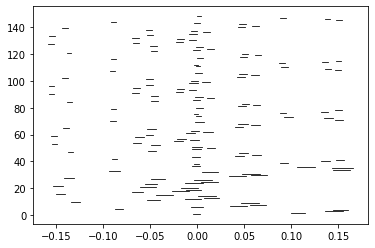

<Figure size 432x216 with 0 Axes>

In [36]:
%matplotlib inline
for i in range(0, 148):
    plt.plot([biasconf['Lower Bound Bias'][i],biasconf['Upper Bound Bias'][i]],[148-i,148-i], '-',linewidth=0.8,color="black")
plt.figure(figsize=(6,3))
plt.show()
